# Testing tools of RobotEnv

In [2]:
# importar librerias
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline 
import mujoco_py

from RobotEnv.tools.controllers import PID
from RobotEnv.tools import simulation
from RobotEnv.tools.controllers import Manipulator_Agent
from RobotEnv.tools.logger import Logger

import glfw


## Test PID

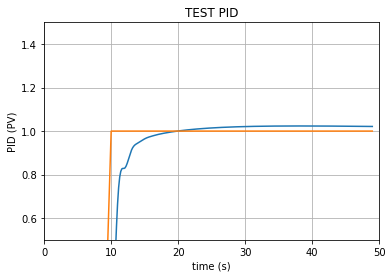

In [2]:
def main():

    L = 50
    pid = PID(P=0.7,I=1.5, D=0.001)

    pid.r_t = 0.0
    pid.set_sample_time(0.01)


    END = L
    y_t = 0

    y_t_list  = []
    time_list = []
    r_t_list = []

    for i in range(1, END):
        pid.update(y_t)
        u_t = pid.u_t
        if pid.r_t > 0:
            y_t += (u_t - (1/i))
        if  i > 9:
            pid.r_t = 1


        time.sleep(0.02)

        y_t_list.append(y_t)
        r_t_list.append(pid.r_t)
        time_list.append(i)

    time_sm = np.array(time_list)
    time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)

    helper_x3 = make_interp_spline(time_list, y_t_list)
    feedback_smooth = helper_x3(time_smooth)

    plt.plot(time_smooth, feedback_smooth)
    plt.plot(time_list, r_t_list)
    plt.xlim((0, L))
    plt.ylim((min(y_t_list)-0.5, max(y_t_list)+0.5))
    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')

    plt.ylim((1-0.5, 1+0.5))

    plt.grid(True)
    plt.show()

main()

## Test simulation

In [3]:
def main():
    
    #simulator
    sim = simulation.create_simulation('robotModelV2.xml')

    #viewer
    viewer = simulation.create_viewer(sim)
    viewer2 = mujoco_py.MjViewer(sim)


    print(sim)
    print(viewer2)
    
main()

Creating window glfw
Creating window glfw


## Test agent controller

In [2]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")
    
    #controller
    controller = Manipulator_Agent("../agents/ddpg4/pyt_save/model.pt", sim, 4, render=False)

    for i in range(10):
        controller.move_to(np.array([0.1, 0.1, 0.5]), timer=100)


    #para terminar la simulacion renderizada
    glfw.terminate()


main()

no se pudo alcanzar el target en: 99 pasos 0.20000000000000015 seg
no se pudo alcanzar el target en: 99 pasos 0.4000000000000003 seg
resuelto en: 25 pasos 0.45200000000000035 seg
resuelto en: 0 pasos 0.45400000000000035 seg
resuelto en: 0 pasos 0.45600000000000035 seg
resuelto en: 0 pasos 0.45800000000000035 seg
resuelto en: 0 pasos 0.46000000000000035 seg
resuelto en: 0 pasos 0.46200000000000035 seg
resuelto en: 0 pasos 0.46400000000000036 seg
resuelto en: 0 pasos 0.46600000000000036 seg


## test plots

no se pudo alcanzar el target en: 2499 pasos 4.999999999999671 seg


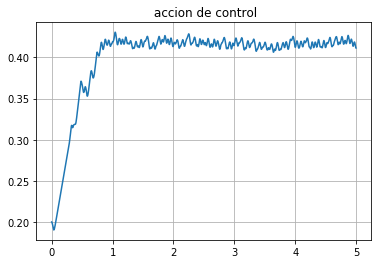

In [5]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")

    #controller
    controller = Manipulator_Agent("../agents/ddpg4/pyt_save/model.pt", sim, 4, render=False)

    # data recollector
    logger = Logger()

    position, qpos, control = controller.move_to(np.array([-0.5, -0.4, 0.5]), distance_threshold=0.01, timer=2500)
    # x = [i for i in range(len(data["pos_x"]))]
    time = [i*0.002 for i in range(len(qpos["base_link"]))]
    y = [i*0.002 for i in range(len(position["pos_y"]))]
    # z = [i*0.002 for i in range(len(position["pos_z"]))]
    error_a = [-0.4 for i in range(len(position["pos_y"]))]

    logger.plot_trajectory(time, qpos["base_link"], grid=True, title=" accion de control")
    # logger.plot_trajectory(x,  data["pos_x"], grid=True, title="posicion en x")
    # logger.plot_trajectory(y,  position["pos_y"], grid=True, title="posición en y")
    # logger.plot_trajectory(z,  position["pos_z"], grid=True)
    # logger.plot_error(y, error_a=position["pos_y"], error_b=error_a, grid=True)
    glfw.terminate()

main()